In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [3]:
car_dataset = pd.read_csv('/content/car data.csv')

In [6]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_dataset.shape


(301, 9)

In [8]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# finding number of missing values

In [10]:
car_dataset.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
# checking distribution of catogorical data 
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [13]:
#encoding data ( Repplacing text in catogorical data with numbers)
#encoding "Fuel Type "
car_dataset.replace({'Fuel_Type':{'Petrol':0 ,'Diesel': 1,'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0 ,'Individual': 1}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0 ,'Automatic': 1}},inplace=True)

In [14]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [15]:
#Splitting Data &  Target

In [17]:
# axis =1 when dropping a column 
# axis =0 when dropping a row
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [18]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [19]:
Y


0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [21]:
# Splitting train & Test

In [22]:
# trainging data in xtrain
# testing data in xtest
# training prices ( output) in ytrain
# testing prices in ytest
# test size is the %( in decimals ) of the dataset that will be used for testing 
# rest will be used for trainig 
# random_state splits the data randomly
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state=2)

# Model Trainig

1. Linear Regression

In [42]:
lin_reg_model = LinearRegression()

In [30]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation


In [31]:
# prediction of training data 
training_data_prediction = lin_reg_model.predict(X_train)

In [32]:
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)

In [34]:
#depends on magnitude of data
error_score

0.8799451660493711

Visualize the actual vs predicted prices

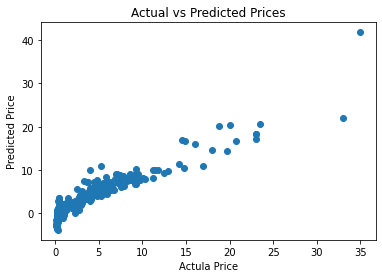

In [40]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actula Price")
plt.ylabel("Predicted Price")
plt.title('Actual vs Predicted Prices')
plt.show()

In [36]:
test_data_prediction = lin_reg_model.predict(X_test)

In [38]:
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [39]:
error_score

0.8365766715027051

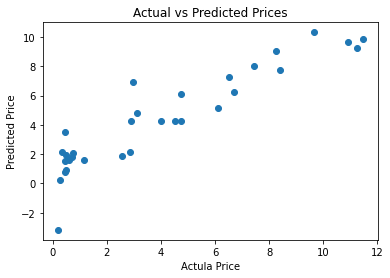

In [41]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actula Price")
plt.ylabel("Predicted Price")
plt.title('Actual vs Predicted Prices')
plt.show()

2 . Lasso Regression

In [43]:
las_reg_model = Lasso()

In [44]:
las_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation


In [45]:
# prediction of training data 
training_data_prediction = las_reg_model.predict(X_train)

In [46]:
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)

In [47]:
#depends on magnitude of data
error_score

0.8427856123435794

Visualize the actual vs predicted prices

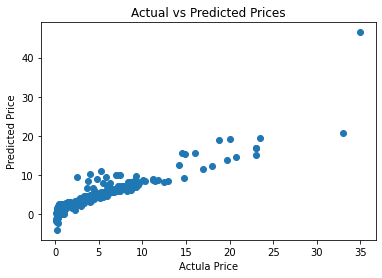

In [48]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actula Price")
plt.ylabel("Predicted Price")
plt.title('Actual vs Predicted Prices')
plt.show()

In [49]:
test_data_prediction = las_reg_model.predict(X_test)

In [50]:
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [51]:
error_score

0.8709167941173195

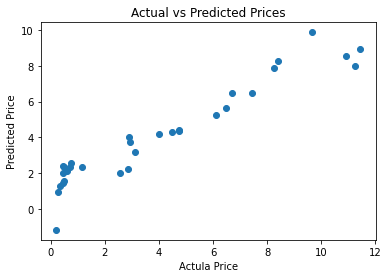

In [52]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actula Price")
plt.ylabel("Predicted Price")
plt.title('Actual vs Predicted Prices')
plt.show()